# Creating and visualizing our network graph
After all the work it took to arrive at our list of nodes and edges, this notebook will (I hope) seem surprisingly straightforward—though it will probably leave us with a lot of questions for potential future work.

## 1 - Reloading our data
Rather than running through the code from the last notebook all over again, we'll just reload the data from the .csv files we saved.

### 1a - Connect to Google Drive

In [1]:
#Code cell 1.a.1
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### 1b - Get our nodes list
We'll open the file of nodes that you saved to your output directory and save the information in it to a simple dictionary.

In [2]:
#Code cell 1.b.1
import csv

node_labels = {}
#Uncomment line 8 and comment out line 9 if you didn't get to the point of 
#saving data from the last notebook

# with open('/gdrive/MyDrive/rbs_digital_approaches_2021/data/2021_s2_d2_emergency_nodefile.csv', 'r') as nodefile :
with open('/gdrive/MyDrive/rbs_digital_approaches_2021/output/wmr_nodes.csv', 'r') as nodefile :
  nodereader = csv.DictReader(nodefile, delimiter=',', quotechar='"')
  for row in nodereader :
    node_id = int(row['ID'])
    label = row['Label']
    node_type = row['Type']
    link = row['Link']
    node_labels.setdefault(node_id, {'label': label,
                                     'node_type': node_type,
                                     'link': link})

for k, v in node_labels.items() :
  print(k, v)

1 {'label': 'Edward Bulwer Lytton, Baron Lytton. Zanoni.', 'node_type': 'Book', 'link': 'https://lib.bsu.edu/wmr/book_record.php?ID=54'}
2 {'label': 'Frances Hodgson Burnett. Little Lord Fauntleroy.', 'node_type': 'Book', 'link': 'https://lib.bsu.edu/wmr/book_record.php?ID=73'}
3 {'label': "Frances Hodgson Burnett. Sara Crewe; or, What happened at Miss Minchin's.", 'node_type': 'Book', 'link': 'https://lib.bsu.edu/wmr/book_record.php?ID=75'}
4 {'label': 'Daniel Defoe. Life and adventures of Robinson Crusoe.', 'node_type': 'Book', 'link': 'https://lib.bsu.edu/wmr/book_record.php?ID=88'}
5 {'label': 'Susan Coolidge. A little country girl.', 'node_type': 'Book', 'link': 'https://lib.bsu.edu/wmr/book_record.php?ID=91'}
6 {'label': 'Mary Mapes Dodge. Hans Brinker, or The silver skates : a story of life in Holland.', 'node_type': 'Book', 'link': 'https://lib.bsu.edu/wmr/book_record.php?ID=104'}
7 {'label': 'Mary Mapes Dodge. Donald and Dorothy.', 'node_type': 'Book', 'link': 'https://lib.bsu

### 1c - Get our edges table
Just as with our nodes file, except we'll save this information to a list of tuples.

(Note that in both cells, I've converted numerical data to integers to avoid headaches later.)

In [3]:
edges = []

#Uncomment line 5 and comment out line 6 if you didn't get to the point of 
#saving data from the last notebook
# with open('/gdrive/MyDrive/rbs_digital_approaches_2021/data/2021_s2_d2_emergency_edgesfile.csv', 'r') as edgesfile :
with open('/gdrive/MyDrive/rbs_digital_approaches_2021/output/wmr_edges.csv', 'r') as edgesfile :
  edgesreader = csv.DictReader(edgesfile, delimiter=',', quotechar='"')
  for row in edgesreader :
    edges.append((int(row['From']), int(row['To'])))

for edge in edges :
  print(edge)

(447, 173)
(448, 262)
(449, 283)
(450, 51)
(451, 236)
(452, 240)
(453, 8)
(454, 105)
(455, 9)
(456, 111)
(457, 332)
(458, 19)
(459, 229)
(460, 24)
(461, 330)
(462, 303)
(463, 81)
(464, 991)
(465, 311)
(466, 116)
(467, 354)
(468, 294)
(469, 441)
(470, 103)
(471, 312)
(472, 14)
(473, 146)
(474, 93)
(475, 106)
(476, 271)
(477, 430)
(478, 71)
(479, 270)
(480, 230)
(481, 364)
(482, 229)
(459, 343)
(483, 322)
(455, 261)
(484, 139)
(485, 238)
(486, 281)
(487, 298)
(488, 423)
(489, 8)
(449, 124)
(490, 276)
(491, 137)
(492, 403)
(493, 393)
(494, 315)
(495, 144)
(496, 226)
(497, 292)
(498, 269)
(499, 214)
(455, 112)
(500, 366)
(501, 391)
(502, 384)
(503, 184)
(504, 310)
(505, 285)
(506, 313)
(507, 344)
(508, 225)
(509, 295)
(510, 111)
(511, 113)
(512, 7)
(513, 134)
(514, 291)
(515, 411)
(516, 42)
(517, 208)
(518, 233)
(519, 400)
(520, 319)
(521, 194)
(466, 121)
(522, 164)
(475, 240)
(523, 246)
(524, 36)
(525, 44)
(494, 106)
(526, 169)
(449, 116)
(527, 402)
(528, 91)
(529, 9)
(461, 335)
(530, 114

## 2 - Creating a network graph with `Networkx`
We import the `networkx` package, then create a new graph object (`G`). 

By using `Graph()`, I've created this as a "undirected" graph, that is one that does not assume any kind of directionality to the relationship between the nodes: all relationships are reciprocal

We then add our list of tuples for our edges with weights as weighted edges.

In [4]:
import networkx as nx

In [55]:
G = nx.Graph()
G.add_edges_from(edges)

Believe it or not, we just created a network graph in two lines (plus, uh, however many thousands of lines of code are `Networkx`). `Networkx` can do some basic visualization of its network graphs using the `matplotlib` package, so let's just check to see that we do, in fact have something.

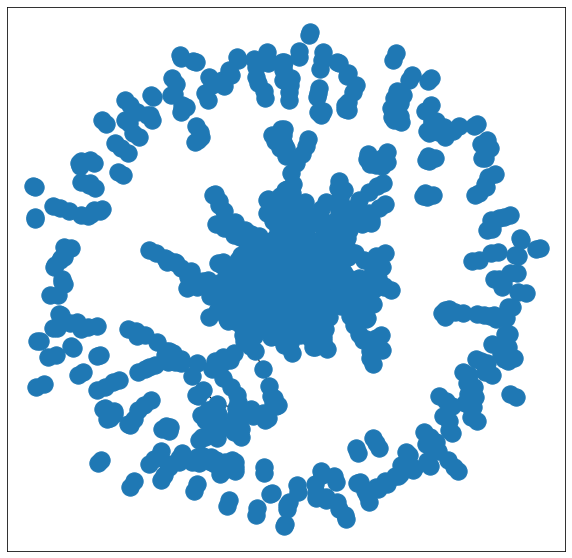

In [6]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=False)

## 3 - Examining the network before visualizing it
Now, that's not much to look at, I'll grant you. We'll arrive at a more attractive visualization (and there's still more we could do, to be sure), but let's pause a minute before we do.

It's easy to be dazzled by visualizations of network graphs, but it's important to bear in mind that a visualization isn't the network, itself. It's just—well, a visualization of the network. We want to think about the underlying data that are being represented so that we can consider how to make our visualization provide real insight into those data.

Print the next cell, and consider just how sparse this information looks at first blush—and yet, in a real sense, *that's* the "network."

In [8]:
print(G.nodes(data=True))
print(G.edges(data=True))

[(447, {}), (173, {}), (448, {}), (262, {}), (449, {}), (283, {}), (450, {}), (51, {}), (451, {}), (236, {}), (452, {}), (240, {}), (453, {}), (8, {}), (454, {}), (105, {}), (455, {}), (9, {}), (456, {}), (111, {}), (457, {}), (332, {}), (458, {}), (19, {}), (459, {}), (229, {}), (460, {}), (24, {}), (461, {}), (330, {}), (462, {}), (303, {}), (463, {}), (81, {}), (464, {}), (991, {}), (465, {}), (311, {}), (466, {}), (116, {}), (467, {}), (354, {}), (468, {}), (294, {}), (469, {}), (441, {}), (470, {}), (103, {}), (471, {}), (312, {}), (472, {}), (14, {}), (473, {}), (146, {}), (474, {}), (93, {}), (475, {}), (106, {}), (476, {}), (271, {}), (477, {}), (430, {}), (478, {}), (71, {}), (479, {}), (270, {}), (480, {}), (230, {}), (481, {}), (364, {}), (482, {}), (343, {}), (483, {}), (322, {}), (261, {}), (484, {}), (139, {}), (485, {}), (238, {}), (486, {}), (281, {}), (487, {}), (298, {}), (488, {}), (423, {}), (489, {}), (124, {}), (490, {}), (276, {}), (491, {}), (137, {}), (492, {})

### 3.a - Adding a little more information to the network
I don't know about you, but I don't feel like I'm very well equipped to draw great insight from a list of tuples, by themselves. Let's add a little bit more information to that blank dictionary that's attached to each node, beginning with the labels we brought in with our node list.

In [56]:
for id, values in node_labels.items() :
  G.add_node(id, id=id, label=values['label'], node_type=values['node_type'], 
              link=values['link'])

print(G.nodes(data=True))

[(447, {'id': 447, 'label': 'Mrs. Kate Kessler', 'node_type': 'Borrower', 'link': 'https://lib.bsu.edu/wmr/patron_record.php?ID=357'}), (173, {'id': 173, 'label': 'Sir Walter Scott. The fortunes of Nigel and Count Robert of Paris.', 'node_type': 'Book', 'link': 'https://lib.bsu.edu/wmr/book_record.php?ID=5447'}), (448, {'id': 448, 'label': 'Harry Ward', 'node_type': 'Borrower', 'link': 'https://lib.bsu.edu/wmr/patron_record.php?ID=250'}), (262, {'id': 262, 'label': 'William Taylor Adams. Bear and forbear : or, The young skipper of Lake Ucayga.', 'node_type': 'Book', 'link': 'https://lib.bsu.edu/wmr/book_record.php?ID=7877'}), (449, {'id': 449, 'label': 'Roy Harrington', 'node_type': 'Borrower', 'link': 'https://lib.bsu.edu/wmr/patron_record.php?ID=166'}), (283, {'id': 283, 'label': "Thomas Wallace Knox. John Boyd's adventures : merchant sailor, man-of-war's-man, privateersman, pirate, and algerine slave.", 'node_type': 'Book', 'link': 'https://lib.bsu.edu/wmr/book_record.php?ID=7954'})

### 3.b - Calculating network algorithms
`Networkx` can make a lot more sense of these tuples than I can. The package can calculate lots of different network metrics for us so that we can begin learning more about the nature of our network and the kinds of connections that we see.

**Note:** I do not consider myself very well-versed in network theory, generally, or in `networkx` specifically. I feel sure there are more elegant way to get at and display some of these values than I've managed to figure out, but perhaps this can get us started.

#### 3.b.1 - Calculating degree
The first algorithm we'll use is "degree centrality," which counts the number of connections a node has to other nodes in the network. Because our graph is a directed graph, we can calculate both "in degree" (the number of connections coming into a node—the number of times a node is a target of an edge—somethign that only happens with books in our network) and "out degree" (the number of times a node is the source of an edge—something that only happens with borrowers).

The next cell calculates the in-degree and out-degree of all the nodes in the graph and then adds those values to the dictionary of attributes for each node (as we did with labels, above). 

In [57]:
degree = dict(nx.degree(G))
nx.set_node_attributes(G, name='degree', values=degree)
print(G.nodes(data=True))

[(447, {'id': 447, 'label': 'Mrs. Kate Kessler', 'node_type': 'Borrower', 'link': 'https://lib.bsu.edu/wmr/patron_record.php?ID=357', 'degree': 1}), (173, {'id': 173, 'label': 'Sir Walter Scott. The fortunes of Nigel and Count Robert of Paris.', 'node_type': 'Book', 'link': 'https://lib.bsu.edu/wmr/book_record.php?ID=5447', 'degree': 1}), (448, {'id': 448, 'label': 'Harry Ward', 'node_type': 'Borrower', 'link': 'https://lib.bsu.edu/wmr/patron_record.php?ID=250', 'degree': 7}), (262, {'id': 262, 'label': 'William Taylor Adams. Bear and forbear : or, The young skipper of Lake Ucayga.', 'node_type': 'Book', 'link': 'https://lib.bsu.edu/wmr/book_record.php?ID=7877', 'degree': 2}), (449, {'id': 449, 'label': 'Roy Harrington', 'node_type': 'Borrower', 'link': 'https://lib.bsu.edu/wmr/patron_record.php?ID=166', 'degree': 10}), (283, {'id': 283, 'label': "Thomas Wallace Knox. John Boyd's adventures : merchant sailor, man-of-war's-man, privateersman, pirate, and algerine slave.", 'node_type': '

This cell constructs a list of the in-degree values, node labels, node types, and node ids then prints the entries for books them out in reverse sorted order of in-degree, showing us which books in the graph were borrowed the most.

In [11]:
show_degrees = []
for node, data in G.nodes(data=True) :
  show_degrees.append([data['degree'], data['label'], data['node_type'], data['id']])

for show_degree in reversed(sorted(show_degrees)) :
  if show_degree[2] == 'Book' :
    print(show_degree)

[11, 'L. T. Meade. A world of girls : the story of a school.', 'Book', 269]
[10, 'Edward Sylvester Ellis. Ned in the woods : a tale of the early days in the west.', 'Book', 240]
[10, 'Charles Austin Fosdick. Frank in the woods.', 'Book', 106]
[9, 'Horatio Alger. The young outlaw, or, Adrift in the streets.', 'Book', 315]
[9, 'Horatio Alger. Fame and fortune, or, The progress of Richard Hunter.', 'Book', 125]
[8, "Horatio Alger. Herbert Carter's legacy, or, The inventor's son.", 'Book', 340]
[8, 'Charles Austin Fosdick. Frank on the lower Mississippi.', 'Book', 103]
[8, 'Charles Austin Fosdick. Frank among the rancheros.', 'Book', 109]
[7, 'Edward Sylvester Ellis. The last war trail.', 'Book', 8]
[7, "Charles Austin Fosdick. Go-ahead : or, The fisher-boy's motto.", 'Book', 310]
[6, 'William Taylor Adams. Breaking away : or, The fortunes of a student.', 'Book', 254]
[6, 'Horatio Alger. The young miner : or, Tom Nelson in California.', 'Book', 124]
[6, 'Horatio Alger. Paul the peddler, or

This cell takes a similar approach, but displays borrowers in revers sorted order of their out-degree, which allows us to see the most prolific borrowers.

In [12]:
for show_degree in reversed(sorted(show_degrees)) :
  if show_degree[2] == 'Borrower' :
    print(show_degree)

[10, 'Roy Harrington', 'Borrower', 449]
[10, 'George Sutton', 'Borrower', 494]
[9, 'Mrs. Kate Knowlton', 'Borrower', 455]
[8, 'Eddie Iceman', 'Borrower', 577]
[7, 'Harry Ward', 'Borrower', 448]
[7, 'Harry Hanika', 'Borrower', 469]
[6, 'Nellie Weisse', 'Borrower', 659]
[6, 'Nellie Gallivan', 'Borrower', 649]
[6, 'Jeannie Smith', 'Borrower', 563]
[6, 'Eddie Icerman', 'Borrower', 721]
[6, 'Earl Tuhey', 'Borrower', 647]
[5, 'Reuben Lloyd', 'Borrower', 746]
[5, 'Ralph Winters', 'Borrower', 531]
[5, 'Octavia Zellers', 'Borrower', 468]
[5, 'Lula Warrick', 'Borrower', 496]
[5, 'Georgia Cole', 'Borrower', 677]
[5, 'Charlie Blease', 'Borrower', 744]
[5, 'Carl Nafus', 'Borrower', 646]
[5, 'Arthur Johnson', 'Borrower', 454]
[4, 'Willie Kemper', 'Borrower', 545]
[4, 'WR Snyder', 'Borrower', 499]
[4, 'Vida Stacy', 'Borrower', 777]
[4, 'Vera Stinson', 'Borrower', 470]
[4, 'Roscoe Jones', 'Borrower', 529]
[4, 'Rollie Bunch', 'Borrower', 541]
[4, 'Pearl Smith', 'Borrower', 650]
[4, 'Nellie Jerrett', 'B

#### 3.b.3 - Thinking about shortest paths
Betweenness is really about which nodes are most likely to connect other nodes—which nodes lie on the shortest path between other given nodes in the network. 

`Networkx` allows us to take a look at shortest paths directly. The next two cells use two different functions related to measuring shortest paths. `shortest_path()` simply returns the first shortest path (I believe weight may be a consideration in ranking them). 

I've had `Networkx` calculate the shortest path between two nodes (these happen to be G. Strahan and J. and J. Knapton, whose rankings on the above algorithms caught my eye, and whom I knew not to have been directly connected in any imprint statement in this set from 1730). The output of the first cell should come as no surprise. It seems like it might be interesting to note, though, that there are, in fact, several equally short paths between Strahan and the Knaptons in this graph.

I've included the ids for the nodes in the displays of degree and betweenness, above, so you might try plugging in other node ids to see what the shortest paths look like: how does your intuition about the meaning of somebody's betweenness centrality compare to what the shortest path calculations show?

In [24]:
shortest_path = nx.shortest_path(G, source=449, target=455)
label = nx.get_node_attributes(G, 'label')
print(label[449])
print(label[shortest_path[1]])
print(label[455])

Roy Harrington
Horatio Alger. Fame and fortune, or, The progress of Richard Hunter.
Mrs. Kate Knowlton


In [34]:
all_shortest_paths = [p for p in nx.all_shortest_paths(G, source=455, target=806)]
print(label[455])
for book in all_shortest_paths[0][1:-1] :
  print(label[book])
print(label[806])


Mrs. Kate Knowlton
Horatio Alger. Fame and fortune, or, The progress of Richard Hunter.
George Sutton
Charles Austin Fosdick. Frank in the woods.
Mr. Roy Palmer


#### 3.b.2 - Feel free to read the docs and try out some more
As I've said, I'm no expert on network theory or on `Networkx`. If you know about networks, you might find it interesting to look through the [documentation of `Networkx's` algorithms](https://networkx.org/documentation/stable/reference/algorithms/index.html), add a few code cells here, and see if you can calculate a different measure that you think might tell us something about this network from 1895. 

Not all network algorithms are applicable to directed graphs like this one.

## 4 - Okay, let's visualize the graph, already
We'll be using `Bokeh` to try to improve on the basic visualization we got with `matplotlib`, above. `Bokeh` is a *very* sophisticated visualization package for Python that I have made some shift to use for visualizing our network graph (with much Googling and use of StackOverflow, it must be said.) I also benefited greatly from an [excellent guide](https://melaniewalsh.github.io/Intro-Cultural-Analytics/Network-Analysis/Making-Network-Viz-with-Bokeh.html) by Melanie Walsh (currently at Cornell University). Still, there seems to be *lots* more that `Bokeh` can do.

We'll create two visualizations. The second will be a variation on the first that will incorporate community detection to make the communities that `Networkx` detects in the graph visible through color.

The code for `Bokeh` visualization doesn't lend itself very well to being broken up into separate cells, so I've added comments to try to explain as best I'm able what each part of the code is doing.

**Note:** You may need to run the code in the cells twice to get the visualizations to display properly.

In [66]:
node_color_attrs = {}
node_size_attrs = {}

for node, data in G.nodes(data=True):
  if data['node_type'] == 'Borrower' :
    node_color = 'cornsilk'
  else :
    node_color = 'cornflowerblue'

  if G.degree[node] < 1 :  
    node_size = 2 * G.degree[node]
  else : 
    node_size = G.degree[node]
  node_color_attrs[node] = node_color
  node_size_attrs[node] = node_size

nx.set_node_attributes(G, node_color_attrs, "node_color")
nx.set_node_attributes(G, node_size_attrs, "node_size")

In [67]:
#Import several components of bokeh that will be used in both visualizations—
#not all components are necessary for this first one
import bokeh.io
from bokeh.io import show
bokeh.io.output_notebook()
from bokeh.plotting import figure, from_networkx
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool, 
                          PanTool, WheelZoomTool)
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap

#Create a plot object with some basic settings. Note that we are including
#a toolbar and indicating that our graph should be scaled up on both axes
#to fit the available space
plot = figure(title='WMR July 1895', 
              tools='', toolbar_location='above', sizing_mode='scale_both')

#Create a tool to display information about a node when the pointer hovers over
#it. 
node_hover_tool = HoverTool(tooltips=[('', '@label'),('id', '@id')])

#Add selected tools to our plot object: the node_hover_tool and _edge_hover_tool
#we just created, plus tools for panning around the visualization and using
#the mouse's scroll wheel to zoom in and out 
plot.add_tools(node_hover_tool, TapTool(), BoxSelectTool(), PanTool(), WheelZoomTool())

#Create a graph from the networkx graph we created
graph = from_networkx(G, nx.spring_layout, scale=3, center=(0,0))

#Set attributes for sizing our nodes according to their degree
#This is a parameter that could probably be tweaked in an effort to 
#make a pleasing but still faitful visualization of the graph
node_size_attrs = {}
for node in G.nodes():    
    node_size = G.degree[node] * .5
    node_size_attrs[node] = node_size
nx.set_node_attributes(G, node_size_attrs, 'node_size')

#Render the nodes in the graph using the node_size and node_color attributes we
#created. Change the color of the nodes when they are selected or hovered over
graph.node_renderer.glyph = Circle(size="node_size", fill_color='node_color')
graph.node_renderer.selection_glyph = Circle(size="node_size", fill_color=Spectral8[2])
graph.node_renderer.hover_glyph = Circle(size="node_size", fill_color=Spectral8[1])

#Render the edges in the graph—same idea as the rendering of nodes, above.
#h/t: https://stackoverflow.com/a/49749123
graph.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=1)
graph.edge_renderer.selection_glyph = MultiLine(line_color=Spectral8[2], line_width=1)
graph.edge_renderer.hover_glyph = MultiLine(line_color=Spectral8[1], line_width=1)

#Set how the graph should behave when a node is selected or inspected—highlight
#the nodes and linked edges
graph.selection_policy = NodesAndLinkedEdges()
graph.inspection_policy = NodesAndLinkedEdges()

#Add our graph to the plot object
plot.renderers.append(graph)

#Show the plot object
show(plot)

In [64]:
print(G.number_of_nodes(), G.number_of_edges())
remove_list = []
for node, data in G.nodes(data=True) :
  if data['degree'] < 4 :
    remove_list.append(node)
print(len(remove_list))
print(remove_list)
G.remove_nodes_from(remove_list)
print(G.number_of_nodes(), G.number_of_edges())

223 249
104
[283, 450, 19, 459, 24, 465, 311, 312, 146, 93, 475, 238, 423, 276, 226, 366, 501, 391, 285, 506, 508, 511, 7, 516, 400, 164, 524, 335, 534, 375, 368, 41, 552, 191, 557, 326, 559, 371, 565, 318, 307, 426, 110, 201, 586, 40, 17, 376, 600, 605, 48, 218, 132, 637, 263, 648, 107, 120, 658, 661, 665, 666, 212, 668, 25, 673, 221, 418, 82, 3, 317, 253, 427, 693, 695, 436, 252, 386, 420, 297, 730, 284, 257, 739, 740, 365, 267, 771, 387, 346, 404, 789, 794, 799, 801, 832, 863, 866, 902, 910, 918, 927, 931, 999]
119 126


## 5 - Next steps
As I suggested above, the visualizations here are just scratching the surface of what `Bokeh` can do. If you were preparing network graphs of this sort for a web-based project, you would probably end up using different tools. The [D3](https://d3js.org) might be one possibility to explore.

This notebook has only touched on the kinds of things that we might discover from network analysis, but should at least give us a starting point for discussion.